<a href="https://colab.research.google.com/github/winfred-mutinda-crypto/winfred/blob/master/Language_Identification_Classification_Hachathon_Winfred_Mutinda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORE Data Science Academy Classification Hackathon

© Explore Data Science Academy

---
### Honour Code

I {**Winfred Mutinda**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

<h2><center>South African Language Identification</h2></center>
<figure>
<center><img src ="https://drive.google.com/uc?id=1Gng5_QN5I3TKsbd5kVIkmG33la5sr2hL" width = "700" height = '400'/>

*Introduction*
<p align = "justify"> Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society. It is therefore critical to to be able to know the language a person is speaking based on the information he/she gives.

*About the problem*
<p align = "justify">This is a NLP Language Identification problem. In this challenge, we will take a text which is in any of South Africas 11 official languages and identify which language the text is in.

*Objective*
<p align = "justify"> We will create a model which will take a text and identify which language the text is in or rather belongs.



*About the data*
<p align = "justify"> The dataset used for this challenge is the NCHLT Text Corpora collected by the South African Department of Arts and Culture & Centre for Text Technology (CTexT, North-West University, South Africa). The training set was improved through additional cleaning done by Praekelt.

#### The language IDs has the following categories:

*   afr - Afrikaans
*   eng - English
*   nbl - isiNdebele
*   nso - Sepedi
*   sot - Sesotho
*   ssw - siSwati
*   tsn - Setswana
*   tso - Xitsonga
*   ven - Tshivenda
*   xho - isiXhosa
*   zul - isiZulu

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


In [1]:
# Importing packages for loading data, visualizing our data
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## Packages for data preparation before medelling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn import metrics

## Packages for model creation
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

## Packages to assess our model performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Setting global constants to ensure notebook results are reproducible

RANDOM_STATE = 42


import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
In this section, we will load all our two data files(train and test) datasets and also load a sample on submission file(to see how we will submit on kaggle later).

In [2]:
## Loading our train data and storing it in a dataframe
url = 'https://raw.githubusercontent.com/winfred-mutinda-crypto/winfred/master/train_set.csv'
df_train = pd.read_csv(url)
df_train.head(10)



,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [3]:
## Loading our train data and storing it in a dataframe
url = 'https://raw.githubusercontent.com/winfred-mutinda-crypto/winfred/master/test_set.csv'
df_test = pd.read_csv(url)
df_test.head()



,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [4]:
## Loading our train data and storing it in a dataframe
url = 'https://raw.githubusercontent.com/winfred-mutinda-crypto/winfred/master/sample_submission.csv'
df_submission = pd.read_csv(url)
df_submission.head()



,index,lang_id
0,1,tsn
1,2,nbl


In [5]:
## Checking the shape of our train dataset
df_train.shape

(33000, 2)

In [6]:
## Checking the shape of our test dataset
df_test.shape

(5682, 2)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
> Exploratory data analysis (EDA) is the process of analysing and investigating data sets and summarizing their main characteristics and trends by using both non-graphical and graphical methods. 

> It is important because it helps in determining how best to manipulate data to get the required answers, expose trends, patterns, relationships and getting insights from the dataset.


#### 3.1 Univariate Non-Graphical Analysis
In this sub-section, we are going to view our dataset by considering the following:  \
    i.  Checking presence of *null* values  \
    ii. Checking for dataset *data types*\
    iii. Checking our *unique values*.

In [7]:
# Check for null values
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

Our dataset has no null values.

In [8]:
# Check for data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [9]:
## Check for unique values
df_train['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

We have 11 unique objects under the language ID.

In [10]:
## check language ID counts 
df_train['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

#### 3.2 Univariate Graphical Analysis
In this sub-section, we are going to view our dataset using the count plot.

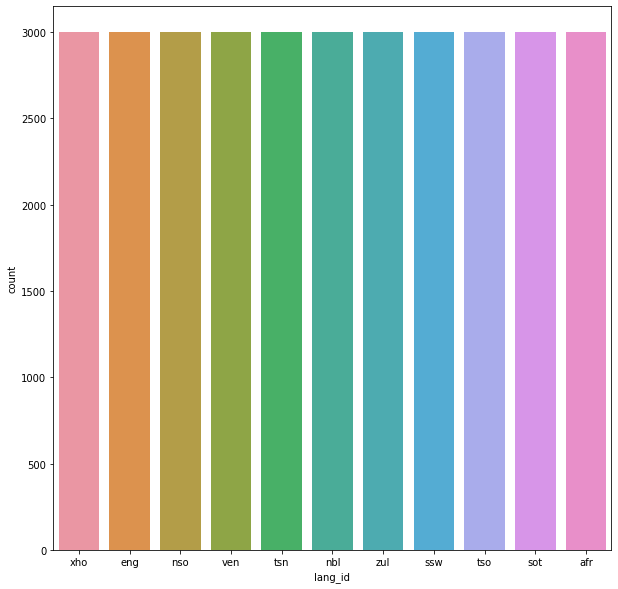

In [11]:
## Visualizing the target feature
plt.figure(figsize=(10,10))
sns.countplot(df_train['lang_id'])

All our language categories have the same count of values

In [12]:
## View of the train data on the third row
df_train['text'][2]

'the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months'

### EDA summary
- The dataset contains two columns (language ID(lang_id) and text)
- Both lang_id and text are non-numeric
- lang_id column has eleven different unique objects with same size.

<a id="four"></a>
## 4. Data Engineering
###4.1 Text Cleaning
####4.1.1 Removing Noise
>The data which is provided contains irrelevant or meaningless data normally known as noise which can significantly affect various data
analysis tasks of machine learning. Therefore, we need to remove noise in order to prepare our data for analysis. 

We will achieve this by: 

* Converting all uppercase to lower case
* Removing punctuation
* Remove new lines (\n) from the start of any words

### Converting capitalized words to lowercase words

We write a function called *lowercase_converter* to convert capitalized words to lowercase words

In [13]:
def lowercase_converter(data, col):

    df = data.copy()
    df[col] = df[col].str.lower()

    return df

In [14]:
# Create a new dataframe with all words in the text column converted to its lowercase form
new_df_train = lowercase_converter(df_train, 'text')
new_df_train.head()


,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


### Removing punctuations

We write a function called *punctuation_remover* to remove all punctuation words

In [15]:

def punctuation_remover(data, col):
   
    def operation(text):
        return ''.join([l for l in text if l not in string.punctuation])
    
    df = data.copy()
    
    df[col] = df[col].apply(operation)
    return df

In [16]:
# Create a new dataframe with the text column having no punctuations
new_df_train = punctuation_remover(new_df_train, 'text')
new_df_train.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


### Remove new lines (\n)

We remove any new line (line starting with '\n'). We write a function *newline_remover* to execute this task.

In [17]:

def newline_remover(data, col):
 
    def operation(text):
        result = re.sub("\n", "", text)
        return result

    df = data.copy()
    
    df[col] = df[col].apply(operation)

    return df

In [18]:
# Create a new dataframe with the text column having no new lines
new_df_train = newline_remover(new_df_train, 'text')
new_df_train.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


### 4.2 Transforming text into numbers

- CounterVectorizer
- TfidfVectorizer

Most models do not work well with text, hence the need to convert our text into numbers. To execute this task and more, we can use **CountVectorizer** or **TfidfVectorizer** packages from sklearn library.

#### CountVectorizer
**CountVectorizer** and **TfidfVectorizer**has some **hyperparameters** which we can asign desired values to while initialising. 
The **hyperparameters** that we shall be tunning for these work are: 

- **max_df** :  When building the vocabulary ignore terms that have a document frequency strictly higher than the                     given threshold (corpus-specific stop words). If float, the parameter represents a proportion of                       documents,integer absolute counts.This parameter is ignored if vocabulary is not None.

- **min_df** :  When building the vocabulary ignore terms that have a document frequency strictly lower than the given                 threshold. This value is also called cut-off in the literature. If float, the parameter represents a                   proportion of documents, integer absolute counts.This parameter is ignored if vocabulary is not None.

- **max_features**: If not None, build a vocabulary that only consider the top max_features ordered by term frequency                     across the corpus. This parameter is ignored if vocabulary is not None.

- **analyzer**: Whether the feature should be made of word n-gram or character n-grams. Option ‘char_wb’ creates                       character n-grams only from text inside word boundaries; n-grams at the edges of words are padded with                 space.

- **ngram_range**: The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to                    be extracted.

### CountVectorizer

In [19]:
#CV = CountVectorizer(max_features=3000,analyzer='word', ngram_range=(1, 2))

#### Tfdifvectorizer

In [20]:
tfidf = TfidfVectorizer(max_features = 16000 , max_df=0.8)

In [21]:
# Transform the text column
X_count = tfidf.fit_transform(new_df_train['text']).toarray()
print(X_count.shape)

(33000, 16000)


In [22]:
# Viewing the dataframe
Training = pd.DataFrame(X_count, columns=tfidf.get_feature_names())
Training.head()

,aa,aan,aanbied,aandag,aandui,aangaande,aangebied,aangebring,aangedui,aangegaan,...,ṱhoḓea,ṱhoḓisiso,ṱhukhu,ṱhuṱhuwedzo,ṱo,ṱola,ṱoḓa,ṱoḓea,ṱun,ṱuṱuwedza
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Preparing our data for training

In [23]:
X = Training
y = new_df_train['lang_id']


### Label Encoding our *y* variable

In [24]:
label = LabelEncoder()
y_label = label.fit_transform(y)

In [25]:
# View our y
y_label

array([9, 9, 1, ..., 1, 9, 4])

In [26]:
#Checking the shape of our y
y_label.shape

(33000,)

In [27]:
label.classes_

array(['afr', 'eng', 'nbl', 'nso', 'sot', 'ssw', 'tsn', 'tso', 'ven',
       'xho', 'zul'], dtype=object)

### Test dataset preparation  ( for kaggle submission )

To enable us make prediction with our model, we have to import the **test** dataset and execute all data engineering operation executed on the **train** dataset.

These activities are: 
- **convert words to lowercases**
- **remove punctions**
- **remove newlines**

In [28]:
# Import and view the first 5 rolls of our training dataset

url = 'https://raw.githubusercontent.com/winfred-mutinda-crypto/winfred/master/test_set.csv'
df_test = pd.read_csv(url)
df_test.head()



,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [29]:
# Create a new dataframe with all words in the message column converted to its lowercase form
new_df_test = lowercase_converter(df_test, 'text')
new_df_test.head()


,index,text
0,1,"mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu.
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta.


In [30]:
# Create a new dataframe with the text column having no punctuations
new_df_test = punctuation_remover(new_df_test, 'text')
new_df_test.head()

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta


In [31]:
# Create a new dataframe with the message column having no new lines
new_df_test = newline_remover(new_df_test, 'text')
new_df_test.head()

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta


### Transform test dataset 

We transform the test dataset using the chosen vectorizer ***vector** from the vectorizer section above


In [32]:
# Transform the de_tok column
X_test_final = tfidf.transform(new_df_test['text']).toarray()
test_new = pd.DataFrame(X_test_final, columns=tfidf.get_feature_names())
print(test_new.shape)

(5682, 16000)


<a id="five"></a>
## 5. Modelling
For this problem we are going to try some models like:

*   Logistic Regression
*   Stochastic Gradient Descent
*   K-Nearest Neighbors
*   Decision trees
*   Naive Bayes



### Spliting our dataset

Before we proceed to modelling, we have to split our data set into two sets (Training and Testing), to enable us internally evaluate the respective performance of our models. to achive this, we make use of sklearn **train_test_split** class.

In [33]:
# getting our training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.2, random_state=RANDOM_STATE)

In [34]:
## defining our model names
names = ['SGDClassifier','Logistic Regression', 'Nearest Neighbors','Decision Tree', 
         'Naive Bayes']

In [35]:
#defining our model classifiers
classifiers = [
    SGDClassifier(loss='hinge', 
                      alpha=4e-4, 
                      max_iter=20, 
                      verbose=False),
    LogisticRegression(multi_class='ovr'),
    KNeighborsClassifier(2),
    DecisionTreeClassifier(max_depth=5),
    MultinomialNB()
]

In [36]:
# fitting, predicting and evaluating our fitted models
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)
    
    print ('... predicting')
    y_pred = clf.predict(X_train)   
    y_pred_test = clf.predict(X_test)
    
    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='macro')
    recall    = metrics.recall_score(y_train, y_pred, average='macro')
    
    f1        = metrics.f1_score(y_train, y_pred,average='macro')    
    f1_test   = metrics.f1_score(y_test, y_pred_test,average='macro')    
    
    # Save the results to dictionaries
    models[name] = clf    
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)
    
    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

    
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting SGDClassifier model...
... predicting
... scoring
Fitting Logistic Regression model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Naive Bayes model...
... predicting
... scoring
... All done!


In [37]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Naive Bayes,0.999129,0.999130,0.999132,0.999131,0.996941,1.286370
Logistic Regression,0.998523,0.998529,0.998529,0.998528,0.994343,165.330585
SGDClassifier,0.996970,0.996974,0.996982,0.996975,0.993881,40.594382
Nearest Neighbors,0.674280,0.925865,0.674524,0.682216,0.556007,0.315372
Decision Tree,0.570227,0.736719,0.569618,0.521600,0.515118,18.779903


#### Plotting our results to better understand the models

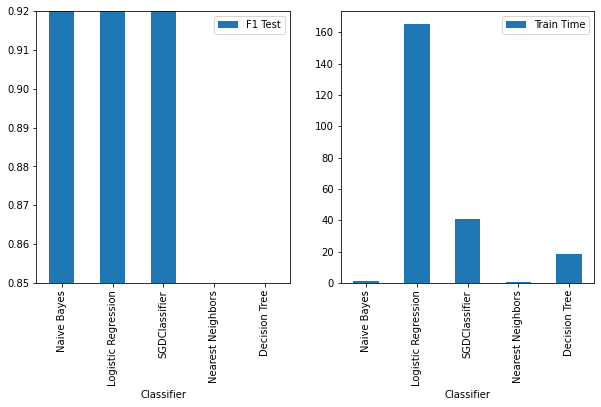

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.85,0.92])
results.plot(y='Train Time', kind='bar', ax=ax[1])

From the above analysis, we can deduce that the Naive Bayes model has the highest accuracy and least training time.

#### Printing out cofusion matrices for some models

In [48]:
print(confusion['Logistic Regression'])

print(confusion['SGDClassifier'])

print(confusion['Naive Bayes'])

[[2415    0    0    0    0    2    0    0    0    0    0]
 [   0 2385    0    0    0    0    0    0    0    0    0]
 [   0    0 2402    0    0    0    0    0    1    1   13]
 [   0    0    0 2373    0    0    2    0    0    0    0]
 [   0    0    0    0 2382    0    0    0    0    0    0]
 [   0    0    0    0    0 2410    0    0    0    0    6]
 [   0    1    0    0    0    0 2401    0    0    0    0]
 [   0    0    0    0    0    0    0 2439    0    0    0]
 [   0    0    0    0    0    0    0    0 2366    0    0]
 [   0    0    0    0    0    0    0    0    0 2389    2]
 [   0    0    3    0    0    0    0    0    0    8 2399]]
[[2417    0    0    0    0    0    0    0    0    0    0]
 [   0 2385    0    0    0    0    0    0    0    0    0]
 [   0    0 2395    0    0    0    0    0    1    3   18]
 [   0    0    0 2372    0    0    3    0    0    0    0]
 [   0    0    0    0 2380    0    2    0    0    0    0]
 [   0    0    0    0    0 2407    0    0    0    0    9]
 [   0    1  

#### Printing out the Classification report

In [49]:
print(class_report['Naive Bayes'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2417
           1       1.00      1.00      1.00      2385
           2       1.00      1.00      1.00      2417
           3       1.00      1.00      1.00      2375
           4       1.00      1.00      1.00      2382
           5       1.00      1.00      1.00      2416
           6       1.00      1.00      1.00      2402
           7       1.00      1.00      1.00      2439
           8       1.00      1.00      1.00      2366
           9       1.00      1.00      1.00      2391
          10       1.00      1.00      1.00      2410

    accuracy                           1.00     26400
   macro avg       1.00      1.00      1.00     26400
weighted avg       1.00      1.00      1.00     26400



**We will choose the Naive Bayes model**.

In [50]:

model =  MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

<a id="six"></a>
## 6. Model Performance
In this section, we are going to see our model performance using the text dataset.


In [51]:
pred = model.predict(X_test)
print("Train Accuracy Score:",round(model.score(X_train, y_train),2))
print("Test Accuracy Score:",round(accuracy_score(y_test, pred),2))

Train Accuracy Score: 1.0
Test Accuracy Score: 1.0


### Classification report

In [52]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       1.00      1.00      1.00       615
           2       0.99      0.99      0.99       583
           3       1.00      1.00      1.00       625
           4       1.00      1.00      1.00       618
           5       1.00      1.00      1.00       584
           6       1.00      1.00      1.00       598
           7       1.00      1.00      1.00       561
           8       1.00      1.00      1.00       634
           9       1.00      0.99      0.99       609
          10       0.99      0.99      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



### Confusion matrix

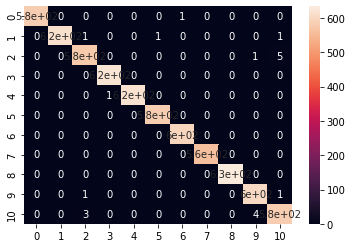

In [53]:
test_pred = label.inverse_transform(pred)
test_label = label.inverse_transform(y_test)
cf_matrix = confusion_matrix(test_pred, test_label)
sns.heatmap(cf_matrix, annot=True)

### Creating a submission file
We will first create a path to our google drive where we will save our submission.

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
%cd'/content/drive/MyDrive/Colab Notebooks/Classification Hackathon'

/content/drive/MyDrive/Colab Notebooks/Classification Hackathon


In [58]:
sub_pred = model.predict(test_new)
submission = pd.DataFrame()
submission['index'] = new_df_test['index']
submission['lang_id'] = label.inverse_transform(sub_pred)
submission.to_csv('submission1.csv', index=False)

<a id="seven"></a>
## 7. Model Explanation
We will explain the choice of our best performing model.


**Naive Bayes** is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. A Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

We can say that due to this assumption, our model gave the best results and was able to classify our text data with high accuracy.

## Conclusion

We can conclude that Naive Bayes can be accurately used to classify our text data into a language the text belongs.